In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import the python library pandas
import pandas as pd 

#here i set limits on what i allow the phyton to show in tables
from pandas import set_option
set_option('display.max_rows',10) 
#limits rows show in tablle by 10(above). change this number if you want more or less rows visible

#import weather data to python. 
weather_data_quest = pd.read_csv('QuestU_Remote_Weather_Station_oct312015.csv',index_col='Date_Time')


#assigning columns names 
weather_data_quest.columns=[['test','rain_mm','temp','rh','wind_direction','wind_speed','gust_speed']]

#show what the table of weather_data_quest looks like. 
weather_data_quest


,test,rain_mm,temp,rh,wind_direction,wind_speed,gust_speed
Date_Time,,,,,,,
09/23/15 09:04:59 AM,1,NaN,12.243,84.6,64.6,0.76,6.30
09/23/15 09:19:59 AM,2,0.0,12.316,84.4,92.7,0.00,0.76
09/23/15 09:34:59 AM,3,0.0,12.340,84.7,1.4,0.00,1.51
09/23/15 09:49:59 AM,4,0.0,12.074,84.6,7.0,0.00,1.26
09/23/15 10:04:59 AM,5,0.0,12.413,86.3,325.7,0.00,1.26
...,...,...,...,...,...,...,...
10/31/15 01:04:59 PM,3665,0.0,13.281,91.5,88.4,0.00,0.50
10/31/15 01:19:59 PM,3666,0.2,12.654,94.5,99.7,0.00,1.51
10/31/15 01:34:59 PM,3667,0.0,12.122,97.9,233.1,0.00,1.76


In [17]:
weather_data_quest.dtypes

test                int64
rain_mm           float64
temp              float64
rh                float64
wind_direction    float64
wind_speed        float64
gust_speed        float64
dtype: object

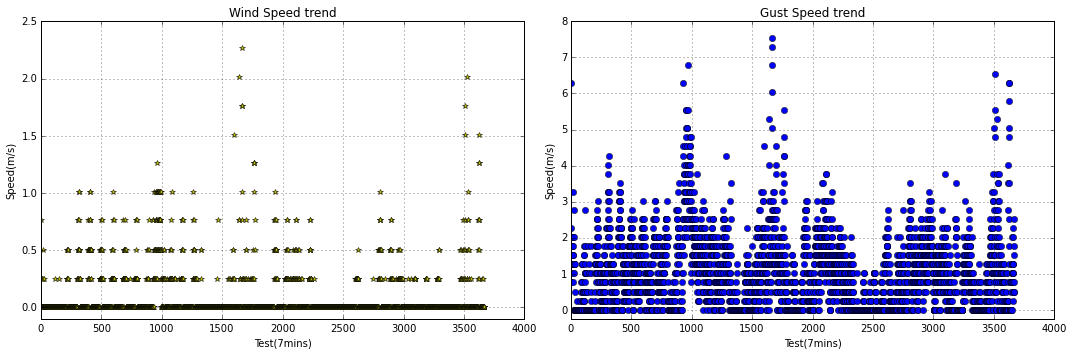

In [26]:
plt.figure(figsize=(15,5))

# define subplot 1 
plt.subplot(1,2,1)
plt.plot(weather_data_quest.wind_speed, marker='*', color='y', linestyle='')

#add title
plt.title('Wind Speed trend')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Speed(m/s)')
plt.xlabel ('Test(7mins)')

#modify x axis limits

plt.xlim(-1,)
plt.ylim(-.1,)


# define subplot 2
plt.subplot(1,2,2)
plt.plot(weather_data_quest.gust_speed, marker='o', color='b',linestyle='' )

#add title
plt.title('Gust Speed trend')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Speed(m/s)')
plt.xlabel ('Test(7mins)')

#modify x axis limits

plt.xlim(-.1,)
plt.ylim(-.25,)

#gice plots some breathing room
plt.tight_layout()

#show plot 
plt.show()

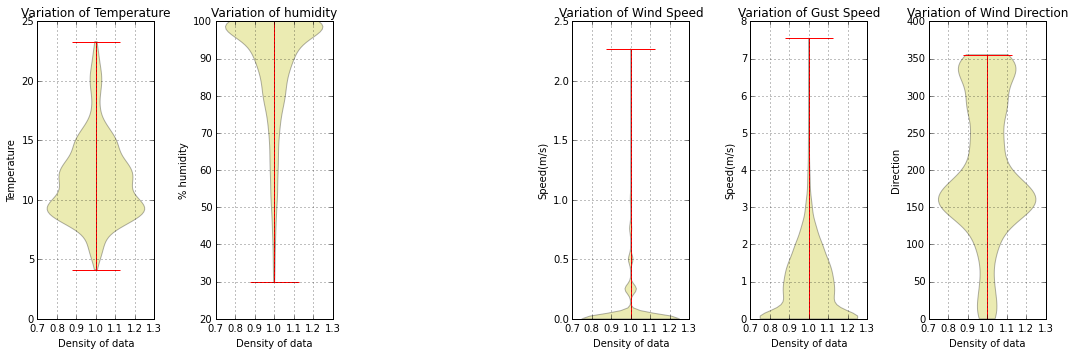

In [31]:
#here i look to see where most of my data is more prevolent by using violin graphs. 

#,'rain_mm','temp','rh','wind_direction','wind_speed','gust_speed'

#fig size 
plt.figure(figsize=(15,5))


# define subplot 1 
plt.subplot(1,6,1)
plt.violinplot(weather_data_quest['temp'])

#add title
plt.title('Variation of Temperature')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Temperature')
plt.xlabel ('Density of data')


# define subplot 2
plt.subplot(1,6,2)
plt.violinplot(weather_data_quest['rh'])

#add title
plt.title('Variation of humidity')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('% humidity')
plt.xlabel ('Density of data')


# define subplot 3
plt.subplot(1,6,4)
plt.violinplot(weather_data_quest['wind_speed'])

#add title
plt.title('Variation of Wind Speed')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Speed(m/s)')
plt.xlabel ('Density of data')

# define subplot 4
plt.subplot(1,6,5)
plt.violinplot(weather_data_quest['gust_speed'])

#add title
plt.title('Variation of Gust Speed')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Speed(m/s)')
plt.xlabel ('Density of data')


# define subplot 5
plt.subplot(1,6,6)
plt.violinplot(weather_data_quest['wind_direction'])

#add title
plt.title('Variation of Wind Direction')

#add gridlines
plt.grid(True)

#add axis lables 
plt.ylabel ('Direction')
plt.xlabel ('Density of data')


#gice plots some breathing room
plt.tight_layout()

#show plot 
plt.show()

In [ ]:
g